In [1]:
import numpy as np

from linear_regression import LinearRegression as MyLinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def print_information(first_model, second_model):
    print('Веса')
    print('Импортированная модель: {}, моя модель: {}'.format(first_model.coef_, second_model.get_weights()[:-1]))
    print('Свободный член')
    print('Импортированная модель: {}, моя модель: {}'.format(round(first_model.intercept_, 5), 
                                                              round(second_model.get_weights()[-1], 5)))
    print('Параметры моей модели')
    print('Epsilon = {}, Lambda = {}'.format(second_model.e, second_model.lambda_coef))
    if second_model.regularization is not None:
        print('Alpha =', second_model.alpha)

In [3]:
RANDOM_STATE = 42

Сгенерируем первый набор данных для регрессии:

In [4]:
n_samples = 1000
n_outliers = 50

X, y, coef = make_regression(
    n_samples=n_samples, n_features=1,
    n_informative=1, noise=10,
    coef=True, random_state=RANDOM_STATE
)

# добавим шум 
np.random.seed(RANDOM_STATE)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

Разобьем данные на тренировочную и обучающую выборки:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_STATE
)

## Without Regularization

Обучим линейную модель на тренировочных данных:

In [6]:
linear_regression_model = LinearRegression()  # импортированный модель
my_linear_regression_model = MyLinearRegression()  # моя модель
# обучение обеих моделей
linear_regression_model.fit(X_train, y_train)
my_linear_regression_model.fit(X_train, y_train)

Посмотрим на веса обученных моделей:

In [7]:
print_information(linear_regression_model, my_linear_regression_model)

Веса
Импортированная модель: [11.3272569], моя модель: [11.30718622]
Свободный член
Импортированная модель: -1.35559, моя модель: -1.33312
Параметры моей модели
Epsilon = 1e-05, Lambda = 0.001


Визуализируем полученные результаты:

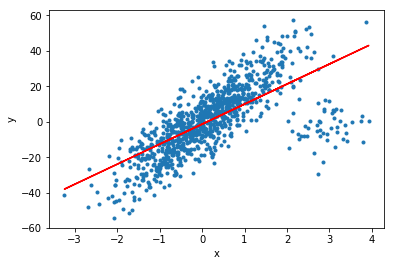

In [8]:
plt.plot(X, y, ".");
plt.plot(X, X * my_linear_regression_model.get_weights()[:-1] + my_linear_regression_model.get_weights()[-1], "r")
plt.xlabel("x");
plt.ylabel("y");
# визуализировать результаты обеих моделей нет смысла, т.к. полученные веса фактически не отличаются

## Lasso Regularization

Переобучим модели, используя L1 регуляризацию:

In [9]:
linear_regression_model = Lasso()  # импортированный модель
my_linear_regression_model = MyLinearRegression(regularization='L1', alpha=0.1)  # моя модель
# обучение обеих моделей
linear_regression_model.fit(X_train, y_train)
my_linear_regression_model.fit(X_train, y_train)

Посмотрим на веса обученных моделей:

In [10]:
print_information(linear_regression_model, my_linear_regression_model)

Веса
Импортированная модель: [11.98464007], моя модель: [12.01549874]
Свободный член
Импортированная модель: 0.65122, моя модель: 0.66768
Параметры моей модели
Epsilon = 1e-05, Lambda = 0.001
Alpha = 0.1


Визуализируем полученные результаты:

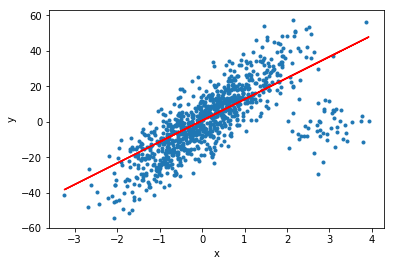

In [11]:
plt.plot(X, y, ".");
plt.plot(X, X * my_linear_regression_model.get_weights()[:-1] + my_linear_regression_model.get_weights()[-1], "r")
plt.xlabel("x");
plt.ylabel("y");
# при данном параметре регуляризации результаты также отличаются друг от друга незначительно

## Tikhonov Regularization

Переобучим модели, используя L2 регуляризацию:

In [12]:
linear_regression_model = Ridge()  # импортированный модель
my_linear_regression_model = MyLinearRegression(regularization='L2')  # моя модель
# обучение обеих моделей
linear_regression_model.fit(X_train, y_train)
my_linear_regression_model.fit(X_train, y_train)

Посмотрим на веса обученных моделей:

In [13]:
print_information(linear_regression_model, my_linear_regression_model)

Веса
Импортированная модель: [12.96528889], моя модель: [8.65315816]
Свободный член
Импортированная модель: 0.65122, моя модель: 0.68058
Параметры моей модели
Epsilon = 1e-05, Lambda = 0.001
Alpha = 0.5


Визуализируем полученные результаты:

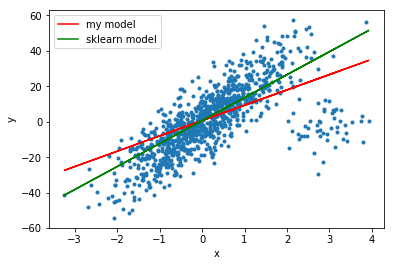

In [14]:
plt.plot(X, y, ".");
plt.plot(X, X * my_linear_regression_model.get_weights()[:-1] + my_linear_regression_model.get_weights()[-1], "r",
         label='my model')
plt.plot(X, X * linear_regression_model.coef_ + linear_regression_model.intercept_, "g", label = 'sklearn model')
plt.xlabel("x");
plt.ylabel("y");
plt.legend();

## Training with two regressors

Создадим тренировочные данные:

In [46]:
def func(x1, x2):
    w0 = 1; w1 = 2; w2 = 3
    return w0+w1*x1+w2*x2

number_of_pints = 100
x1_array = np.random.random_sample(number_of_pints)*np.random.randint(0, 100, number_of_pints)
x2_array = np.random.random_sample(number_of_pints)*np.random.randint(0, 100, number_of_pints)
y_array = func(x1_array, x2_array) + np.random.normal(size=number_of_pints)

X_train = np.array([x1_array, x2_array])
X_train = X_train.T

Обучим нашу модель

In [47]:
# грубое обучение
my_linear_regression_model = MyLinearRegression(e=pow(10, -5))
my_linear_regression_model.fit(X_train, y_array)
print('При точности {} получены веса {}'.format(my_linear_regression_model.e,
                                                my_linear_regression_model.get_weights(), 5))

При точности 1e-05 получены веса [2.00449898 3.00195771 0.81422261]
